In [1]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

# Perceptron multicapas.

## Teorema de aproximación universal.

1989 - George Cybenko para funciones de activación sigmoideas.
1991 - Kurt Hornik demuestra que basta la arquitectura feedforward.

Sea $\phi : \mathbb{R} \rightarrow \mathbb{R}$ una función no constante, acotada y continua, a la que se la denomina función de activación. Sea $U_m : [0,1]^m$ el hipercubo de dimensión m, y sea $C(U_m)$ el espacio de funciones reales continuas sobre $U_m$. 
Entonces, dado cualquier $\epsilon >0$ y cualquier función $f\in C(U_m)$, existe un entero $N$, constantes $\alpha_i, \beta_i \in \mathbb{R}$ y un vector $w_i \in \mathbb{R}^m$ para $i\in 1,...,N$, de manera tal que se define:

\begin{equation*}
F(x) = \sum_{i=1} ^{N} {\alpha_i \phi \left (  w_i ^T ~ x + \beta_i \right )}
\end{equation*}

como una aproximación de la función $f$, tal que $|F(x)-f(x)|<\epsilon$



Entonces, vamos a buscar de aproximar con un modelo a la función $ y = \sin(x)$.

Esto es un problema de regresión, no de clasificación. En este caso, no hay un conjunto de labels.  

Se define el conjunto de entrenamiento $[X , y] : y = f(X)$.

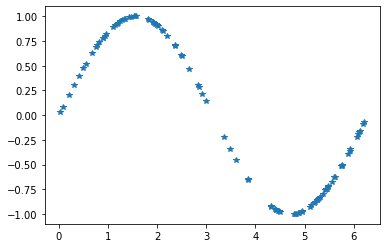

In [2]:
n_muestras = 100
# selección aleatoria muestras del dominio [0,2*pi]
X = np.random.rand(n_muestras,1)*2*np.pi
# salida esperada
y = np.sin(X).reshape(-1)

plt.plot(X,y,'*')

Se define un Perceptron multicapa con un único layer intermedio compuesto por 10 neuronas. La función de activación es 

\begin{equation*}
tanh(x) = \frac {e^x - e^{-x}}{e^x + e^{-x}}
\end{equation*}

con método de optimización limited-memory Broyden–Fletcher–Goldfarb–Shanno (BFGS) y regularización.('adam' o gradiente estocástico es bueno para muchas muestras. No es el caso)


In [15]:
clf = MLPRegressor(hidden_layer_sizes=(20,6),
                   activation='relu',
                   solver='lbfgs',
                   learning_rate='adaptive',
                   max_iter=1000,
                   learning_rate_init=0.01,
                   alpha=0.01)

Habiendo, scikit-learn, generado el modelo por nosotros, lo pedimos que lo entrene:

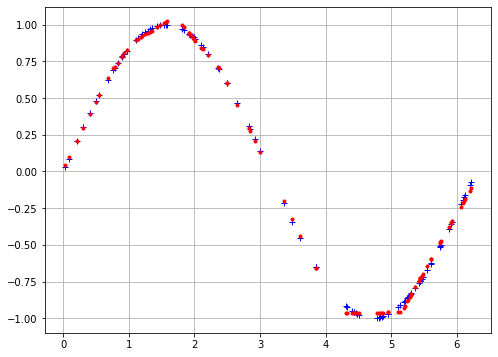

In [16]:
clf.fit(X, y)
y_out = clf.predict(X)
fig = plt.figure(figsize=(8,6))
plt.plot(X,y,'b+')
plt.plot(X,y_out,'r.')
plt.grid()